In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-05 12:40:46.935148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [3]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [4]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## Create Own Model

## iPhone13_I

In [5]:
# reading a data for class  label 0
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/calender-app.cfile")
print(np.array(data))
X, Y = create_dataset(data, 0)

print(X.shape)
print(Y.shape)

[0.015625 +0.015625j  0.       +0.j        0.0078125+0.j        ...
 0.0234375+0.0078125j 0.0234375+0.0078125j 0.03125  -0.0078125j]
2048
77387
(2048, 77387)
[0.01826616 0.00950806 0.00373913 ... 0.00167015 0.00381105 0.00957042]
(10000, 2048)
(10000,)


In [6]:
# reading a data for class  label 1
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/camera-photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 1)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0078125+0.015625j  0.0078125+0.j        0.015625 +0.j        ...
 0.015625 +0.0234375j 0.015625 +0.j        0.015625 +0.j       ]
2048
81265
(2048, 81265)
[0.01835838 0.00961773 0.00350257 ... 0.00192106 0.00369137 0.00963282]
(20000, 2048)
(20000,)


In [7]:
# reading a data for class  label 2
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/camera-video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 2)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.03125  +0.015625j  0.03125  +0.0078125j 0.015625 +0.0078125j ...
 0.0234375+0.015625j  0.0234375+0.0078125j 0.015625 -0.0078125j]
2048
82947
(2048, 82947)
[0.01815592 0.00944388 0.00397235 ... 0.00185365 0.0036876  0.00957425]
(30000, 2048)
(30000,)


In [8]:
# reading a data for class  label 3
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/email-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 3)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.       +0.03125j  0.       +0.j       0.015625 +0.j       ...
 0.015625 -0.015625j 0.0234375+0.015625j 0.0078125+0.015625j]
2048
82654
(2048, 82654)
[0.01825963 0.00967498 0.00359683 ... 0.00195847 0.00358379 0.01038325]
(40000, 2048)
(40000,)


In [9]:
# reading a data for class  label 4
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/gallery-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 4)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.0078125+0.j         0.015625 +0.0078125j  0.015625 +0.015625j  ...
 -0.0078125-0.0078125j  0.015625 -0.0078125j  0.015625 +0.j       ]
2048
81924
(2048, 81924)
[0.018229   0.00966399 0.00349916 ... 0.0020021  0.00391866 0.00949263]
(50000, 2048)
(50000,)


In [10]:
# reading a data for class  label 5
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/home-screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 5)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.0078125j 0.0078125+0.j        0.0078125+0.0078125j ...
 0.015625 +0.0078125j 0.       -0.0078125j 0.015625 -0.0078125j]
2048
87043
(2048, 87043)
[0.01827244 0.0094937  0.00347372 ... 0.00184199 0.00369919 0.00941139]
(60000, 2048)
(60000,)


In [11]:
# reading a data for class  label 6
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 6)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.015625j  0.0234375+0.0078125j 0.       -0.0078125j ...
 0.015625 +0.j        0.015625 +0.0078125j 0.       +0.0078125j]
2048
80022
(2048, 80022)
[0.01823433 0.00957463 0.0036588  ... 0.00179094 0.00355725 0.00951913]
(70000, 2048)
(70000,)


In [12]:
# reading a data for class  label 7
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/phone-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 7)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.015625j  0.0078125+0.0078125j 0.015625 +0.j        ...
 0.015625 +0.015625j  0.03125  +0.015625j  0.015625 +0.0078125j]
2048
91505
(2048, 91505)
[0.01846059 0.01017757 0.00355808 ... 0.00216458 0.00378412 0.01003891]
(80000, 2048)
(80000,)


In [13]:
# reading a data for class  label 8
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/sms-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 8)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.015625j  0.0078125+0.j        0.0234375+0.j        ...
 0.015625 +0.0234375j 0.015625 -0.015625j  0.015625 +0.0234375j]
2048
90846
(2048, 90846)
[0.01815063 0.00949299 0.00352803 ... 0.00193189 0.00359627 0.00958246]
(90000, 2048)
(90000,)


In [14]:
# reading a data for class  label 9
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_I/web_browser-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 9)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 3.1250000e-02+7.8125000e-03j  1.5625000e-02+1.5625000e-02j
  1.5625000e-02+0.0000000e+00j ... -1.3769394e-33-7.7207416e-35j
 -6.0356438e-12-3.6518317e+31j  2.0628625e-32-6.2134089e-35j]
2048
81414
(2048, 81414)
[2.0676641e+35 5.4073593e+35 2.4178817e+35 ... 8.1073708e+34 2.0754027e+35
 2.6083747e+35]
(100000, 2048)
(100000,)


Build a model for iPhone13_I

In [45]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [47]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/17-09-2022/iPhone13/iPHONE13_I_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 29s 11ms/step - loss: 1.9968 - accuracy: 0.5230 - val_loss: 1.4879 - val_accuracy: 0.8952
Epoch 2/25
2532/2532 [==============================] - 31s 12ms/step - loss: 0.9793 - accuracy: 0.9335 - val_loss: 0.5566 - val_accuracy: 0.9570
Epoch 3/25
2532/2532 [==============================] - 29s 11ms/step - loss: 0.3071 - accuracy: 0.9944 - val_loss: 0.1508 - val_accuracy: 0.9982
Epoch 4/25
2532/2532 [==============================] - 31s 12ms/step - loss: 0.0887 - accuracy: 0.9989 - val_loss: 0.0522 - val_accuracy: 0.9991
Epoch 5/25
2532/2532 [==============================] - 27s 11ms/step - loss: 0.0389 - accuracy: 0.9994 - val_loss: 0.0278 - val_accuracy: 0.9994
Epoch 6/25
2532/2532 [==============================] - 25s 10ms/step - loss: 0.0238 - accuracy: 0.9995 - val_loss: 0.0185 - val_accuracy: 0.9994
Epoch 7/25
2532/2532 [==============================] - 26s 10ms/step - loss: 0.0172 - accuracy: 0.9996 - val_loss: 0.0139 -

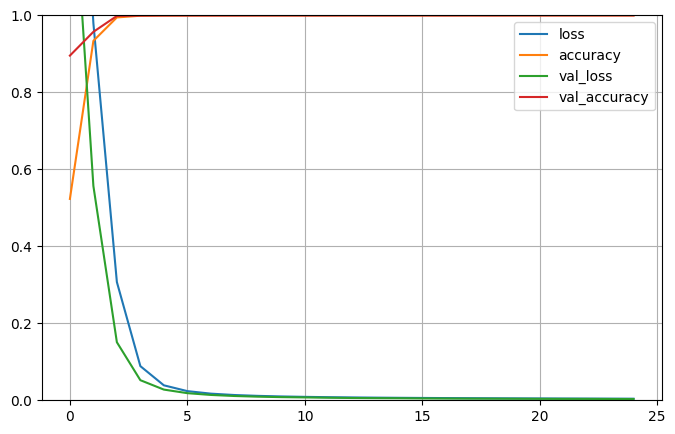

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the own iPhone13_I model

In [50]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/17-09-2022/iPhone13/iPHONE13_I_model.h5")

In [51]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0053 - accuracy: 0.9997
test loss, test acc: [0.005316311493515968, 0.9997000098228455]


In [52]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 4ms/step
[0 6 5 ... 5 5 6]
0


In [53]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    1    0    0    0]
 [   0    0  993    0    0    0    0    0    0    0]
 [   1    0    0  938    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   1    0    0    0    0    0  998    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

## iPhone13_II

In [5]:
# reading a data for class  label 0
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/calender-app.cfile")
print(np.array(data))
X, Y = create_dataset(data, 0)

print(X.shape)
print(Y.shape)

[ 0.078125 +0.09375j    0.5625   -0.8046875j -0.984375 +0.9921875j ...
  0.015625 +0.015625j   0.0078125-0.0078125j  0.015625 +0.015625j ]
2048
81191
(2048, 81191)
[0.03497613 0.0617279  0.03110138 ... 0.02998163 0.05360715 0.04346049]
(10000, 2048)
(10000,)


In [6]:
# reading a data for class  label 1
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/camera-photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 1)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.0078125j 0.03125  +0.0078125j 0.0078125+0.015625j  ...
 0.0078125+0.0078125j 0.0234375+0.0078125j 0.015625 +0.j       ]
2048
72123
(2048, 72123)
[0.0184771  0.00980769 0.00377408 ... 0.00184979 0.00378497 0.00949242]
(20000, 2048)
(20000,)


In [7]:
# reading a data for class  label 2
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/camera-video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 2)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.0078125j]
2048
92893
(2048, 92893)
[0.01809648 0.00941779 0.00405625 ... 0.00197094 0.00359252 0.00953348]
(30000, 2048)
(30000,)


In [8]:
# reading a data for class  label 3
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/email-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 3)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[-0.0078125-0.0078125j  0.0234375-0.0078125j  0.0234375+0.j        ...
  0.03125  +0.0078125j  0.015625 +0.0078125j  0.03125  +0.j       ]
2048
56322
(2048, 56322)
[0.01820297 0.00946224 0.00370945 ... 0.00208693 0.00383636 0.00951074]
(40000, 2048)
(40000,)


In [9]:
# reading a data for class  label 4
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/gallery-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 4)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0390625+0.j        0.015625 +0.0234375j 0.015625 +0.j        ...
 0.0078125+0.0078125j 0.015625 +0.015625j  0.015625 +0.0078125j]
2048
71462
(2048, 71462)
[0.01826507 0.00975554 0.00367946 ... 0.00179136 0.0036102  0.00943712]
(50000, 2048)
(50000,)


In [10]:
# reading a data for class  label 5
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/home-screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 5)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.015625 +0.j         0.015625 +0.0078125j  0.0234375-0.0078125j ...
 -0.0078125-0.0078125j  0.015625 +0.0078125j  0.0234375-0.0078125j]
2048
77534
(2048, 77534)
[0.01885366 0.00955299 0.00381812 ... 0.00175554 0.00354502 0.00999323]
(60000, 2048)
(60000,)


In [11]:
# reading a data for class  label 6
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 6)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0078125+0.0078125j 0.       +0.0078125j 0.015625 +0.0078125j ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.j       ]
2048
71756
(2048, 71756)
[0.01843879 0.00944655 0.00375897 ... 0.00207559 0.00387582 0.00955302]
(70000, 2048)
(70000,)


In [12]:
# reading a data for class  label 7
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/phone-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 7)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0078125+0.0078125j 0.015625 +0.015625j  0.015625 +0.j        ...
 0.015625 +0.0078125j 0.015625 -0.0078125j 0.0234375+0.015625j ]
2048
73292
(2048, 73292)
[0.01814853 0.00943132 0.00351341 ... 0.00200969 0.00380519 0.00951231]
(80000, 2048)
(80000,)


In [13]:
# reading a data for class  label 8
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/sms-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 8)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.0078125j 0.015625 +0.0078125j 0.015625 +0.j        ...
 0.0234375+0.0078125j 0.0078125+0.015625j  0.0234375+0.0078125j]
2048
71611
(2048, 71611)
[0.01817658 0.00939571 0.00359913 ... 0.00174631 0.00362656 0.00942984]
(90000, 2048)
(90000,)


In [14]:
# reading a data for class  label 9
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_II/web_browser-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 9)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375+0.j        0.03125  +0.0078125j 0.03125  +0.015625j  ...
 0.0390625+0.0078125j 0.0234375+0.j        0.       +0.0078125j]
2048
84116
(2048, 84116)
[0.01812239 0.00943426 0.00367463 ... 0.00178114 0.00367117 0.00942098]
(100000, 2048)
(100000,)


Build iPhone13_II Model

In [15]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

2022-09-17 20:11:10.883550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [17]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [18]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/17-09-2022/iPhone13/iPHONE13_II_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 24s 9ms/step - loss: 2.0235 - accuracy: 0.4164 - val_loss: 1.5184 - val_accuracy: 0.7480
Epoch 2/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.9021 - accuracy: 0.9358 - val_loss: 0.3986 - val_accuracy: 0.9963
Epoch 3/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.1936 - accuracy: 0.9977 - val_loss: 0.1209 - val_accuracy: 0.9983
Epoch 4/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0689 - accuracy: 0.9986 - val_loss: 0.0712 - val_accuracy: 0.9987
Epoch 5/25
2532/2532 [==============================] - 24s 9ms/step - loss: 0.0443 - accuracy: 0.9989 - val_loss: 0.0552 - val_accuracy: 0.9990
Epoch 6/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0345 - accuracy: 0.9991 - val_loss: 0.0468 - val_accuracy: 0.9990
Epoch 7/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0289 - accuracy: 0.9991 - val_loss: 0.0405 - val_ac

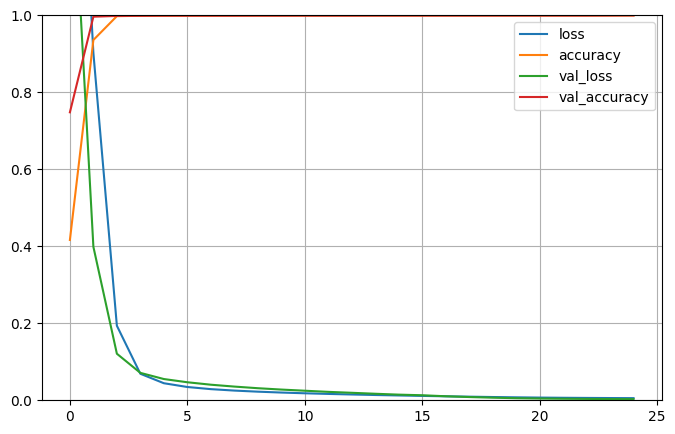

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the Own iPhone13_II Model

In [20]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/17-09-2022/iPhone13/iPHONE13_II_model.h5")

In [21]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0065 - accuracy: 0.9995
test loss, test acc: [0.006476635113358498, 0.9994999766349792]


In [22]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[0 6 5 ... 5 5 6]
0


In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    0  991    0    0    0    1    0    0    1]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    2    0    0  972    0    0]
 [   0    0    0    0    1    0    0    0 1002    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

## iPhone13_III

In [5]:
# reading a data for class  label 0
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/calendar-app.cfile")
print(np.array(data))
X, Y = create_dataset(data, 0)

print(X.shape)
print(Y.shape)

[0.015625 +0.j        0.015625 +0.0078125j 0.0234375+0.015625j  ...
 0.       +0.j        0.015625 -0.0078125j 0.0234375+0.015625j ]
2048
78558
(2048, 78558)
[0.01852033 0.00958475 0.00369698 ... 0.00181086 0.003753   0.00963692]
(10000, 2048)
(10000,)


In [6]:
# reading a data for class  label 1
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/camera-photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 1)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.0234375j 0.0078125+0.j        0.0234375+0.j        ...
 0.03125  +0.0078125j 0.0078125+0.015625j  0.0078125+0.0234375j]
2048
74243
(2048, 74243)
[0.01901824 0.00952496 0.00361272 ... 0.00181022 0.00350893 0.00955064]
(20000, 2048)
(20000,)


In [7]:
# reading a data for class  label 2
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/camera-video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 2)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375+0.j        0.0234375+0.0234375j 0.015625 +0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.0078125j]
2048
79732
(2048, 79732)
[0.01835802 0.00962685 0.00344502 ... 0.00159603 0.00344605 0.00971396]
(30000, 2048)
(30000,)


In [8]:
# reading a data for class  label 3
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/email-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 3)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.j        0.0234375+0.0078125j 0.0078125+0.015625j  ...
 0.       -0.0078125j 0.015625 -0.0078125j 0.03125  +0.0078125j]
2048
72926
(2048, 72926)
[0.01814387 0.00948817 0.00355478 ... 0.00184933 0.0035476  0.0094812 ]
(40000, 2048)
(40000,)


In [9]:
# reading a data for class  label 4
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/gallery-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 4)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375+0.0078125j 0.0234375+0.0078125j 0.0234375+0.j        ...
 0.0078125+0.015625j  0.0234375-0.015625j  0.015625 +0.015625j ]
2048
70219
(2048, 70219)
[0.01831812 0.00958718 0.00350358 ... 0.00182362 0.00372122 0.00951167]
(50000, 2048)
(50000,)


In [10]:
# reading a data for class  label 5
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/home-screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 5)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.03125  +0.j        0.015625 +0.0078125j 0.       +0.0078125j ...
 0.0078125+0.j        0.0078125+0.0078125j 0.0234375-0.0078125j]
2048
73439
(2048, 73439)
[0.01814429 0.00948737 0.00341386 ... 0.00191901 0.00374672 0.00948966]
(60000, 2048)
(60000,)


In [11]:
# reading a data for class  label 6
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 6)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.015625j  0.0078125+0.0078125j 0.0234375+0.0078125j ...
 0.015625 +0.015625j  0.015625 +0.0078125j 0.0078125+0.0078125j]
2048
69895
(2048, 69895)
[0.01831148 0.00957138 0.00356465 ... 0.00186656 0.00368411 0.00954022]
(70000, 2048)
(70000,)


In [12]:
# reading a data for class  label 7
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/phone-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 7)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0078125+0.015625j  0.015625 -0.0078125j 0.03125  -0.0078125j ...
 0.0234375+0.j        0.0078125+0.015625j  0.0078125+0.015625j ]
2048
105986
(2048, 105986)
[0.01823477 0.00951891 0.00358417 ... 0.00211496 0.00367384 0.00949519]
(80000, 2048)
(80000,)


In [13]:
# reading a data for class  label 8
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/sms-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 8)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375+0.j        0.015625 +0.0078125j 0.0078125+0.0078125j ...
 0.0234375+0.0078125j 0.03125  +0.015625j  0.015625 +0.0078125j]
2048
73073
(2048, 73073)
[0.01833369 0.00956394 0.00357049 ... 0.00202475 0.0036879  0.0095438 ]
(90000, 2048)
(90000,)


In [14]:
# reading a data for class  label 9
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_13/iPhone13_III/web_browser-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 9)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375+0.0078125j 0.03125  +0.0078125j 0.015625 +0.j        ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375-0.015625j ]
2048
81190
(2048, 81190)
[0.01873207 0.00957678 0.00342764 ... 0.002072   0.00412383 0.00962331]
(100000, 2048)
(100000,)


Build an own model for iPhone13_III

In [15]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

2022-09-18 12:47:00.575147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [17]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [18]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/17-09-2022/iPhone13/iPHONE13_III_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 23s 9ms/step - loss: 1.8170 - accuracy: 0.5481 - val_loss: 0.9901 - val_accuracy: 0.9098
Epoch 2/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.4600 - accuracy: 0.9831 - val_loss: 0.1945 - val_accuracy: 0.9904
Epoch 3/25
2532/2532 [==============================] - 37s 15ms/step - loss: 0.1085 - accuracy: 0.9977 - val_loss: 0.0765 - val_accuracy: 0.9976
Epoch 4/25
2532/2532 [==============================] - 30s 12ms/step - loss: 0.0574 - accuracy: 0.9982 - val_loss: 0.0526 - val_accuracy: 0.9979
Epoch 5/25
2532/2532 [==============================] - 29s 12ms/step - loss: 0.0421 - accuracy: 0.9983 - val_loss: 0.0436 - val_accuracy: 0.9977
Epoch 6/25
2532/2532 [==============================] - 30s 12ms/step - loss: 0.0343 - accuracy: 0.9983 - val_loss: 0.0369 - val_accuracy: 0.9979
Epoch 7/25
2532/2532 [==============================] - 28s 11ms/step - loss: 0.0292 - accuracy: 0.9985 - val_loss: 0.0323 - v

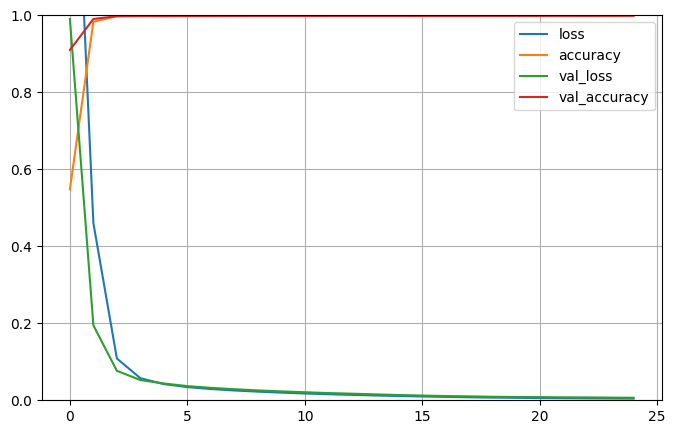

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the own iPhone_III Model

In [20]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/17-09-2022/iPhone13/iPHONE13_III_model.h5")

In [21]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0072 - accuracy: 0.9990
test loss, test acc: [0.007211802061647177, 0.9990000128746033]


In [22]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[0 6 5 ... 5 5 6]
0


In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1010    1    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    2  991    0    0    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    1    0    0 1042    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    0    0    1  973    0    0]
 [   0    0    0    1    1    0    1    0  998    2]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

## Cross-check the same Model without split the dataset as training and testing

iPhone13_I

In [15]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

2022-09-23 12:20:34.077021: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.0040 - accuracy: 0.9998
test loss, test acc: [0.004029067698866129, 0.9997699856758118]


In [18]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 3ms/step
[0 0 0 ... 9 9 9]
0


In [19]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[10000     0     0     0     0     0     0     0     0     0]
 [    0  9998     0     0     0     0     2     0     0     0]
 [    3     0  9997     0     0     0     0     0     0     0]
 [    1     0     2  9995     0     1     1     0     0     0]
 [    1     0     0     0  9998     0     0     0     1     0]
 [    0     2     0     0     0  9996     2     0     0     0]
 [    3     0     0     0     0     0  9997     0     0     0]
 [    1     1     0     0     1     0     0  9997     0     0]
 [    1     0     0     0     0     0     0     0  9999     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     10000
           5       1.00      1.00      1.00 

iPhone13_II

In [15]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")

2022-09-23 12:35:59.051798: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.0052 - accuracy: 0.9997
test loss, test acc: [0.005223894491791725, 0.9996700286865234]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[4 4 4 ... 9 9 9]
4


In [18]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9995     0     0     0     5     0     0     0     0     0]
 [    0 10000     0     0     0     0     0     0     0     0]
 [    0     0  9994     1     1     0     2     1     0     1]
 [    0     1     0  9999     0     0     0     0     0     0]
 [    0     0     0     0 10000     0     0     0     0     0]
 [    0     0     0     0     1  9998     1     0     0     0]
 [    0     0     0     0     1     2  9995     0     0     2]
 [    0     2     0     0     5     0     0  9993     0     0]
 [    0     0     0     0     3     0     0     0  9996     1]
 [    0     0     0     0     1     0     0     1     1  9997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     10000
           5       1.00      1.00      1.00 

iPhone13_III

In [15]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")

2022-09-23 12:49:13.906221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.0048 - accuracy: 0.9994
test loss, test acc: [0.004752619192004204, 0.9994199872016907]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 3ms/step
[0 0 0 ... 9 9 9]
0


In [18]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9997     2     1     0     0     0     0     0     0     0]
 [    0 10000     0     0     0     0     0     0     0     0]
 [    4     8  9988     0     0     0     0     0     0     0]
 [    0     0     0  9999     0     0     0     0     0     1]
 [    0     2     0     0  9997     0     1     0     0     0]
 [    0     0     0     0     1  9989     9     0     0     1]
 [    1     0     0     1     0     0  9998     0     0     0]
 [    0     0     0     0     0     0     5  9995     0     0]
 [    0     0     0     2     3     2     6     0  9981     6]
 [    0     0     0     0     0     0     2     0     0  9998]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     10000
           5       1.00      1.00      1.00 

## Testing Cross Models

iPhone13_model_II to iPhone13_I Device

In [21]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 8.9873 - accuracy: 0.0708
test loss, test acc: [8.987310409545898, 0.07075999677181244]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[4 4 4 ... 0 0 0]
4


In [24]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[    0     0     0     0  9899     0     0     0    58    43]
 [    0   250     0     0     1  7276     0     0  1836   637]
 [    0   159     0     0     2  8235    11     0    94  1499]
 [    0     1  6058     0     1  3756   183     0     0     1]
 [    0   761     0     0     1  7709     0     0  1512    17]
 [    0  1790     0     1     2  6252     0     0  1936    19]
 [    0     0     0     0  8326     0     0     0  1028   646]
 [    0     0     0  9496     1     1     0   501     1     0]
 [    0  9351     0    10     1   565     0     0    72     1]
 [10000     0     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.02      0.03      0.02     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.19      0.63      0.29 

iPhone13_model_III to iPhone13_I Device

In [26]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")

In [27]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 16.1738 - accuracy: 0.1004
test loss, test acc: [16.173818588256836, 0.10042999684810638]


In [28]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[8 8 8 ... 8 8 8]
8


In [29]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[    0     0     0     1     0   168  2266  2897  4668     0]
 [    0     0     0     1     1     0     6     0  9992     0]
 [    0     0     1     1     0     1     3     0  9994     0]
 [    0     0     0     0     2     1     1     0  9996     0]
 [    0     0     0     0     2     0     0     1  9997     0]
 [    0     1     1     1     1     0     8     0  9988     0]
 [    0     1     0     0     0     0    42    68  9889     0]
 [    0     0     0     0     0     0     0     2  9998     0]
 [    0     0     0     1     0     0     3     0  9996     0]
 [    0     0     0     0     0     0     0     0 10000     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.50      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.33      0.00      0.00     10000
           5       0.00      0.00      0.00 

iPhone13_model_I to iPhone13_II Device

In [19]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

In [20]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 10.6013 - accuracy: 0.0891
test loss, test acc: [10.601271629333496, 0.08906000107526779]


In [21]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[0 0 0 ... 2 6 6]
0


In [22]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[   5    0    1    0    0    0    0    0    0 9994]
 [   1    0    0    0    3    0    0    0 9996    0]
 [   1    0   14 8764 1183   30    2    0    6    0]
 [   0    0    0    0   45    5    0 5074 4876    0]
 [5949    0    0    0    0    0 4051    0    0    0]
 [   0    1   17   38 7096 1392    1    4 1451    0]
 [   2   22 8239  136 1137   42    2    0  420    0]
 [  27    0    0    0   24   15    0 4828 5106    0]
 [   5 3431   29    0    0    0 3870    0 2665    0]
 [   3   39  499    0    0    0 9435    0   24    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.94      0.14      0.24     10000
           6       0.00      0.00      0.00     10000
           7       0.49      0.48   

iPhone13_model_III to iPhone13_II Device

In [23]:
model = keras.models.load_model("//Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")

In [24]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 16.9421 - accuracy: 0.1018
test loss, test acc: [16.942100524902344, 0.10183999687433243]


In [25]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[4 4 1 ... 8 8 8]
4


In [26]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 198    2 1292 8201    2  102  186   12    0    5]
 [   0    0    0    1    0    0    0    0 9999    0]
 [   0    0    0    0    2    1    0    1 9996    0]
 [   0    0    0    1    1    0    0    1 9997    0]
 [   0    0    4    1    3  131 8150  262 1449    0]
 [   0    0    1    0    0    0    0    0 9999    0]
 [   0    0    1    0    2    0    1    0 9996    0]
 [   1    0    0    0   21    1    0    1 9976    0]
 [   0    0    1    1    4    1   12    1 9979    1]
 [   0    0    0    0    1    1   18    0 9979    1]]
              precision    recall  f1-score   support

           0       0.99      0.02      0.04     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.08      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.00      0.00     10000
           7       0.00      0.00   

iPhone13_model_I to iPhone13_III Device

In [19]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

In [20]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 20.1494 - accuracy: 0.1880
test loss, test acc: [20.14935874938965, 0.18801000714302063]


In [21]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[0 0 0 ... 0 0 0]
0


In [22]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [ 5461     0     0     0     0     0  4537     0     2     0]
 [ 7726     0     0     0     0     0  2110     0   164     0]
 [ 3237    16     0     0     0     0  5664     0  1083     0]
 [   46    34     0     0     0     0  3229     0  6691     0]
 [10000     0     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.13      1.00      0.23     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00 

iPhone13_model_II to iPhone13_III Device

In [23]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")

In [24]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 12.8690 - accuracy: 0.1635
test loss, test acc: [12.868993759155273, 0.16345000267028809]


In [25]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[4 4 4 ... 4 4 4]
4


In [26]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[    0     0     0     0 10000     0     0     0     0     0]
 [    1     0     0     0  9999     0     0     0     0     0]
 [    0     0     0     0 10000     0     0     0     0     0]
 [    0     0     0     0 10000     0     0     0     0     0]
 [    0     0     0     0 10000     0     0     0     0     0]
 [    0    47     0     0  4375     0     0     0   311  5267]
 [    0    12     0     0  8032     0     0     0  1802   154]
 [    0   120     0     0  1582     0     0     0  8232    66]
 [    0  2365     0     0    32     0     0     0  6345  1258]
 [    0     0     0     0 10000     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.14      1.00      0.24     10000
           5       0.00      0.00      0.00 